This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

In [9]:
    import tensorflow as tf 

    if tf.test.gpu_device_name(): 

        print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

    else:

       print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

ModuleNotFoundError: No module named 'torch'

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [2]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.7280006]
 [-0.5630913]
 [ 1.5864722]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.15152657]
 [0.77715254]
 [0.30536115]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [6]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.013443 ],
       [ 0.6615554],
       [-0.4356721]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [8]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [9]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [10]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [11]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [12]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [13]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [14]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

# An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [24]:
import numpy as np
import tensorflow as tf

num_samples_per_class = 1000
num = num_samples_per_class * 2

In [25]:
mu, sigma = 0, 0.65 # mean and standard deviation
s0 = np.random.normal(mu, sigma, num_samples_per_class)
theta0 = np.random.uniform(0,2*np.pi,num_samples_per_class)
C0_samples = np.array([s0 * np.cos(theta0) + 4, s0*np.sin(theta0) + 5])
C0_samples = np.transpose(C0_samples)
print(C0_samples.shape)

s1 = np.random.normal(mu, sigma, num_samples_per_class) + 4
theta1 = np.random.uniform(0,2*np.pi,num_samples_per_class)
C1_samples = np.array([s1 * np.cos(theta1) + 4, s1*np.sin(theta1) + 5])
C1_samples = np.transpose(C1_samples)
print(C1_samples.shape)

# Testing data
s0 = np.random.normal(mu, sigma, num_samples_per_class)
theta0 = np.random.uniform(0,2*np.pi,num_samples_per_class)
T0_samples = np.array([s0 * np.cos(theta0) + 4, s0*np.sin(theta0) + 5])
T0_samples = np.transpose(T0_samples)
print(T0_samples.shape)

s1 = np.random.normal(mu, sigma, num_samples_per_class) + 4
theta1 = np.random.uniform(0,2*np.pi,num_samples_per_class)
T1_samples = np.array([s1 * np.cos(theta1) + 4, s1*np.sin(theta1) + 5])
T1_samples = np.transpose(T1_samples)
print(T1_samples.shape)

(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)


**Stacking the two classes into an array with shape (2000, 2)**

In [26]:
inputs = np.vstack((C0_samples, C1_samples)).astype(np.float32)
Tinputs = np.vstack((T0_samples, T1_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [27]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets = np.reshape(targets,[num,1])
print(inputs.shape, targets.shape)

# Testing targets
Ttargets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
Ttargets = np.reshape(Ttargets,[num,1])
print(Tinputs.shape, Ttargets.shape)


(2000, 2) (2000, 1)
(2000, 2) (2000, 1)


**Plotting the two classes**

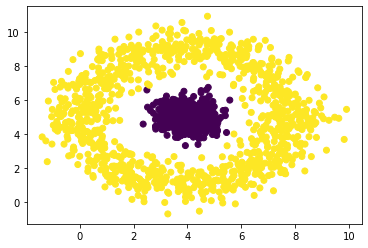

[[3.5738745  4.773719  ]
 [4.6691623  4.0620885 ]
 [3.6520126  5.203984  ]
 ...
 [3.9902112  0.75064486]
 [0.6675793  8.3713455 ]
 [0.7970539  3.1252503 ]] [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [28]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

print(inputs, targets)

## Method 1: TensorFlow, Ch. 3

**Creating the linear classifier variables**

In [37]:
input_dim = 2
output_dim = 1
#W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))


W = tf.Variable([[4.1], [5.1]])
b = tf.Variable([[2.1]])

print(W, b)
print(W.shape, b.shape)
print(inputs.shape)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1],
       [5.1]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1]], dtype=float32)>
(2, 1) (1, 1)
(2000, 2)


**The forward pass function**

In [30]:
def model(inputs): 
    tmp = tf.reshape(tf.square(tf.norm(tf.transpose(W) - inputs, axis=1)), [num,1])
    return tf.math.sigmoid((tmp - b)*10) 
    # return (tf.math.sign(tmp - b) + 1 ) / 2
    # return tf.matmul(inputs-np.transpose(W), np.transpose(inputs)-W)

**The mean squared error loss function**

In [21]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [33]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    print(W, b)
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [34]:
for step in range(4000):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0501246],
       [5.098972 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.14521]], dtype=float32)>
Loss at step 0: 0.0058
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0495324],
       [5.0989127]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1460829]], dtype=float32)>
Loss at step 1: 0.0058
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.048962 ],
       [5.0988545]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1469464]], dtype=float32)>
Loss at step 2: 0.0058
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0484123],
       [5.098797 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1478012]], dtype=float32)>
Loss at step 3: 0.0058
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.037273 ],
       [5.0978913]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.175506]], dtype=float32)>
Loss at step 41: 0.0056
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.037137],
       [5.097905]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1761446]], dtype=float32)>
Loss at step 42: 0.0056
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.037006],
       [5.097921]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1767797]], dtype=float32)>
Loss at step 43: 0.0056
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0368795],
       [5.0979385]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1774116]], dtype=float32)>
Loss at step 44: 0.0056
<tf.Variable 'Variable:0' shape=(2, 1) dtype=floa

       [5.0995994]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1978743]], dtype=float32)>
Loss at step 79: 0.0054
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0344954],
       [5.0996733]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1984215]], dtype=float32)>
Loss at step 80: 0.0054
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.034471 ],
       [5.0997486]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.198967]], dtype=float32)>
Loss at step 81: 0.0054
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0344486],
       [5.099825 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.199511]], dtype=float32)>
Loss at step 82: 0.0054
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0344276],
       [5.0999026]], dtype=float32)> <tf.Varia

       [5.103674 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2197254]], dtype=float32)>
Loss at step 121: 0.0053
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0344925],
       [5.1037917]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2202232]], dtype=float32)>
Loss at step 122: 0.0053
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.03451],
       [5.10391]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2207203]], dtype=float32)>
Loss at step 123: 0.0053
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0345283],
       [5.104029 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2212167]], dtype=float32)>
Loss at step 124: 0.0053
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0345473],
       [5.104149 ]], dtype=float32)> <tf.Var

       [5.109663 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2419202]], dtype=float32)>
Loss at step 167: 0.0052
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0356545],
       [5.109801 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2423887]], dtype=float32)>
Loss at step 168: 0.0052
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0356827],
       [5.1099386]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2428567]], dtype=float32)>
Loss at step 169: 0.0052
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.035711],
       [5.110077]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2433243]], dtype=float32)>
Loss at step 170: 0.0052
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.035739],
       [5.110215]], dtype=float32)> <tf.Var

       [5.1156373]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2620304]], dtype=float32)>
Loss at step 211: 0.0051
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0367165],
       [5.115767 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2624755]], dtype=float32)>
Loss at step 212: 0.0051
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0367336],
       [5.115896 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.26292]], dtype=float32)>
Loss at step 213: 0.0051
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0367503],
       [5.1160254]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2633638]], dtype=float32)>
Loss at step 214: 0.0051
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0367665],
       [5.116154 ]], dtype=float32)> <tf.V

       [5.1208224]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2806888]], dtype=float32)>
Loss at step 254: 0.0050
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.03701 ],
       [5.120933]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2811112]], dtype=float32)>
Loss at step 255: 0.0050
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.037005],
       [5.121043]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2815332]], dtype=float32)>
Loss at step 256: 0.0050
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.036999],
       [5.121153]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2819548]], dtype=float32)>
Loss at step 257: 0.0050
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.036993 ],
       [5.1212626]], dtype=float32)> <tf.Varia

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0364676],
       [5.1245694]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2956128]], dtype=float32)>
Loss at step 290: 0.0050
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0364404],
       [5.1246676]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.2960196]], dtype=float32)>
Loss at step 291: 0.0050
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0364127],
       [5.1247654]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.296426]], dtype=float32)>
Loss at step 292: 0.0050
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0363846],
       [5.124863 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.296832]], dtype=float32)>
Loss at step 293: 0.0049
<tf.Variable 'Variable:0' shape=(2, 1) dty

       [5.1312623]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.323811]], dtype=float32)>
Loss at step 361: 0.0048
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.03271  ],
       [5.1313577]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.324202]], dtype=float32)>
Loss at step 362: 0.0048
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0326304],
       [5.131453 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.324593]], dtype=float32)>
Loss at step 363: 0.0048
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.03255  ],
       [5.1315484]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3249838]], dtype=float32)>
Loss at step 364: 0.0048
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.032469 ],
       [5.1316442]], dtype=float32)> <tf.Va

       [5.135544]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3406081]], dtype=float32)>
Loss at step 404: 0.0048
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.028608],
       [5.135649]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3409994]], dtype=float32)>
Loss at step 405: 0.0048
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.028497 ],
       [5.1357546]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3413906]], dtype=float32)>
Loss at step 406: 0.0048
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0283856],
       [5.1358604]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.341782]], dtype=float32)>
Loss at step 407: 0.0048
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0282736],
       [5.1359663]], dtype=float32)> <tf.Var

       [5.140332]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3575032]], dtype=float32)>
Loss at step 447: 0.0047
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0234375],
       [5.14045  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3578978]], dtype=float32)>
Loss at step 448: 0.0047
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.023312],
       [5.140568]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3582923]], dtype=float32)>
Loss at step 449: 0.0047
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0231867],
       [5.140686 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.358687]], dtype=float32)>
Loss at step 450: 0.0047
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0230613],
       [5.140805 ]], dtype=float32)> <tf.Var

       [5.1458783]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3752797]], dtype=float32)>
Loss at step 492: 0.0046
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.01813 ],
       [5.146007]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3756742]], dtype=float32)>
Loss at step 493: 0.0046
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0180273],
       [5.146136 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3760688]], dtype=float32)>
Loss at step 494: 0.0046
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0179257],
       [5.146265 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3764632]], dtype=float32)>
Loss at step 495: 0.0046
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.017825 ],
       [5.1463943]], dtype=float32)> <tf.V

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.014046 ],
       [5.1572576]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4066122]], dtype=float32)>
Loss at step 572: 0.0045
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0140533],
       [5.157419 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4070022]], dtype=float32)>
Loss at step 573: 0.0045
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0140624],
       [5.157582 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4073923]], dtype=float32)>
Loss at step 574: 0.0045
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.014073],
       [5.157745]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4077823]], dtype=float32)>
Loss at step 575: 0.0045
<tf.Variable 'Variable:0' shape=(2, 1) dty

       [5.1647763]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4234393]], dtype=float32)>
Loss at step 615: 0.0044
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0157056],
       [5.1649632]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4238322]], dtype=float32)>
Loss at step 616: 0.0044
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0157723],
       [5.1651506]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4242253]], dtype=float32)>
Loss at step 617: 0.0044
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.01584  ],
       [5.1653385]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4246185]], dtype=float32)>
Loss at step 618: 0.0044
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0159087],
       [5.165527 ]], dtype=float32)> <tf

       [5.17335  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4411216]], dtype=float32)>
Loss at step 660: 0.0043
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.019563 ],
       [5.1735363]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.441512]], dtype=float32)>
Loss at step 661: 0.0043
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.019663],
       [5.173722]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4419024]], dtype=float32)>
Loss at step 662: 0.0043
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.019763],
       [5.173907]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4422925]], dtype=float32)>
Loss at step 663: 0.0043
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0198636],
       [5.1740913]], dtype=float32)> <tf.Vari

       [5.1805754]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4575942]], dtype=float32)>
Loss at step 703: 0.0042
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0239434],
       [5.180719 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4579668]], dtype=float32)>
Loss at step 704: 0.0042
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.024043],
       [5.180861]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.458339]], dtype=float32)>
Loss at step 705: 0.0042
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0241427],
       [5.1810017]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4587107]], dtype=float32)>
Loss at step 706: 0.0042
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.024242 ],
       [5.1811414]], dtype=float32)> <tf.Va

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.027444],
       [5.185096]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4713297]], dtype=float32)>
Loss at step 741: 0.0041
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0275326],
       [5.1851892]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4716787]], dtype=float32)>
Loss at step 742: 0.0041
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.027621 ],
       [5.1852813]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4720273]], dtype=float32)>
Loss at step 743: 0.0041
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.027709 ],
       [5.1853724]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4723752]], dtype=float32)>
Loss at step 744: 0.0041
<tf.Variable 'Variable:0' shape=(2, 1) dty

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.031102 ],
       [5.1881094]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4861104]], dtype=float32)>
Loss at step 785: 0.0041
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.031181],
       [5.188154]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4864335]], dtype=float32)>
Loss at step 786: 0.0041
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.031259],
       [5.188198]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4867558]], dtype=float32)>
Loss at step 787: 0.0041
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0313373],
       [5.188241 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4870777]], dtype=float32)>
Loss at step 788: 0.0041
<tf.Variable 'Variable:0' shape=(2, 1) dtype

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0344906],
       [5.189261 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.4998765]], dtype=float32)>
Loss at step 829: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0345674],
       [5.189269 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5001802]], dtype=float32)>
Loss at step 830: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.034644 ],
       [5.1892767]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5004835]], dtype=float32)>
Loss at step 831: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0347214],
       [5.1892834]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5007865]], dtype=float32)>
Loss at step 832: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) d

Loss at step 873: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0380745],
       [5.1889377]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.513274]], dtype=float32)>
Loss at step 874: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0381584],
       [5.188915 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5135672]], dtype=float32)>
Loss at step 875: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0382423],
       [5.1888914]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5138602]], dtype=float32)>
Loss at step 876: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0383267],
       [5.188867 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5141532]], dtype=float32)>
Loss at step 877: 0.0040
<tf.Variable 'Va

       [5.187333]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5258324]], dtype=float32)>
Loss at step 917: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0420456],
       [5.18728  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.526125]], dtype=float32)>
Loss at step 918: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.042144],
       [5.187227]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5264177]], dtype=float32)>
Loss at step 919: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.042242 ],
       [5.1871724]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5267105]], dtype=float32)>
Loss at step 920: 0.0040
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0423408],
       [5.1871176]], dtype=float32)> <tf.Var

Loss at step 958: 0.0039
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.046413],
       [5.18448 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5382652]], dtype=float32)>
Loss at step 959: 0.0039
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.046529],
       [5.184396]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5385664]], dtype=float32)>
Loss at step 960: 0.0039
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.046645],
       [5.184311]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5388677]], dtype=float32)>
Loss at step 961: 0.0039
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.046762],
       [5.184225]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5391695]], dtype=float32)>
Loss at step 962: 0.0039
<tf.Variable 'Variable:

       [5.180307 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.551213]], dtype=float32)>
Loss at step 1001: 0.0039
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0518007],
       [5.180193 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5515294]], dtype=float32)>
Loss at step 1002: 0.0039
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0519347],
       [5.1800785]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5518463]], dtype=float32)>
Loss at step 1003: 0.0039
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.052069],
       [5.179963]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5521636]], dtype=float32)>
Loss at step 1004: 0.0039
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.052204 ],
       [5.1798472]], dtype=float32)> <t

       [5.1755247]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5638332]], dtype=float32)>
Loss at step 1040: 0.0038
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.057192],
       [5.175397]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5641634]], dtype=float32)>
Loss at step 1041: 0.0038
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0573316],
       [5.1752687]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.564494]], dtype=float32)>
Loss at step 1042: 0.0038
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0574713],
       [5.1751404]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5648246]], dtype=float32)>
Loss at step 1043: 0.0038
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.057611],
       [5.175012]], dtype=float32)> <tf.

       [5.169972 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5788426]], dtype=float32)>
Loss at step 1085: 0.0038
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0632296],
       [5.1698594]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5791771]], dtype=float32)>
Loss at step 1086: 0.0037
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.063354 ],
       [5.1697474]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5795114]], dtype=float32)>
Loss at step 1087: 0.0037
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.063478 ],
       [5.1696362]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5798457]], dtype=float32)>
Loss at step 1088: 0.0037
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0636015],
       [5.1695256]], dtype=float32)>

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0681424],
       [5.1657333]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5937176]], dtype=float32)>
Loss at step 1130: 0.0037
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0682406],
       [5.1656604]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5940425]], dtype=float32)>
Loss at step 1131: 0.0037
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.068338 ],
       [5.1655884]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.594367]], dtype=float32)>
Loss at step 1132: 0.0037
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0684347],
       [5.1655173]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.5946913]], dtype=float32)>
Loss at step 1133: 0.0037
<tf.Variable 'Variable:0' shape=(2, 1

       [5.1634717]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.607401]], dtype=float32)>
Loss at step 1173: 0.0036
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.071999 ],
       [5.1634393]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.607712]], dtype=float32)>
Loss at step 1174: 0.0036
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.072078],
       [5.163408]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.608023]], dtype=float32)>
Loss at step 1175: 0.0036
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.072157 ],
       [5.1633773]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6083333]], dtype=float32)>
Loss at step 1176: 0.0036
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0722356],
       [5.1633477]], dtype=float32)> <tf.

       [5.163224 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.628245]], dtype=float32)>
Loss at step 1242: 0.0036
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0772448],
       [5.1632495]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6285403]], dtype=float32)>
Loss at step 1243: 0.0036
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0773244],
       [5.1632757]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6288352]], dtype=float32)>
Loss at step 1244: 0.0036
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.077404 ],
       [5.1633024]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6291301]], dtype=float32)>
Loss at step 1245: 0.0036
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.077484],
       [5.16333 ]], dtype=float32)> <t

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0809417],
       [5.165112 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6409016]], dtype=float32)>
Loss at step 1285: 0.0035
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0810413],
       [5.1651773]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.641197]], dtype=float32)>
Loss at step 1286: 0.0035
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.081142 ],
       [5.1652436]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6414924]], dtype=float32)>
Loss at step 1287: 0.0035
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.081243 ],
       [5.1653113]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.641788]], dtype=float32)>
Loss at step 1288: 0.0035
<tf.Variable 'Variable:0' shape=(2, 1)

       [5.1691775]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.654159]], dtype=float32)>
Loss at step 1329: 0.0035
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0863256],
       [5.1693034]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6544702]], dtype=float32)>
Loss at step 1330: 0.0035
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0864716],
       [5.169431 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.654782]], dtype=float32)>
Loss at step 1331: 0.0035
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.086619],
       [5.169561]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6550944]], dtype=float32)>
Loss at step 1332: 0.0035
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0867677],
       [5.1696925]], dtype=float32)> <tf

       [5.1763544]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6679842]], dtype=float32)>
Loss at step 1371: 0.0034
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.093984 ],
       [5.1765833]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.668339]], dtype=float32)>
Loss at step 1372: 0.0034
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.094214 ],
       [5.1768155]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6686952]], dtype=float32)>
Loss at step 1373: 0.0034
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.094446],
       [5.177051]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.669053]], dtype=float32)>
Loss at step 1374: 0.0034
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0946813],
       [5.17729  ]], dtype=float32)> <tf

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.106309],
       [5.189847]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6850386]], dtype=float32)>
Loss at step 1414: 0.0033
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.106674 ],
       [5.1902633]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6854885]], dtype=float32)>
Loss at step 1415: 0.0033
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1070423],
       [5.190685 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.685941]], dtype=float32)>
Loss at step 1416: 0.0033
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.107414],
       [5.191111]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.6863964]], dtype=float32)>
Loss at step 1417: 0.0032
<tf.Variable 'Variable:0' shape=(2, 1) dt

       [5.207684 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.703221]], dtype=float32)>
Loss at step 1451: 0.0030
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.121173],
       [5.20819 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.70374]], dtype=float32)>
Loss at step 1452: 0.0030
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.121542],
       [5.208694]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7042587]], dtype=float32)>
Loss at step 1453: 0.0030
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.121907 ],
       [5.2091956]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7047775]], dtype=float32)>
Loss at step 1454: 0.0030
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.122268 ],
       [5.2096944]], dtype=float32)> <tf.Va

       [5.2246456]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.723714]], dtype=float32)>
Loss at step 1492: 0.0028
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.13193 ],
       [5.224937]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7241802]], dtype=float32)>
Loss at step 1493: 0.0028
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1320796],
       [5.2252226]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7246444]], dtype=float32)>
Loss at step 1494: 0.0028
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1322246],
       [5.2255025]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7251067]], dtype=float32)>
Loss at step 1495: 0.0028
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.132365],
       [5.225777]], dtype=float32)> <tf.

       [5.23272  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7414024]], dtype=float32)>
Loss at step 1533: 0.0027
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1354146],
       [5.232839 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7418008]], dtype=float32)>
Loss at step 1534: 0.0027
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1354547],
       [5.2329555]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7421978]], dtype=float32)>
Loss at step 1535: 0.0027
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1354933],
       [5.2330694]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7425935]], dtype=float32)>
Loss at step 1536: 0.0027
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.135531 ],
       [5.2331805]], dtype=float32)>

       [5.2359085]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.757397]], dtype=float32)>
Loss at step 1576: 0.0027
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1364546],
       [5.2359467]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.757744]], dtype=float32)>
Loss at step 1577: 0.0027
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1364703],
       [5.2359834]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7580903]], dtype=float32)>
Loss at step 1578: 0.0027
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.136486 ],
       [5.2360187]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7584352]], dtype=float32)>
Loss at step 1579: 0.0027
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.136502],
       [5.236053]], dtype=float32)> <tf

       [5.236612 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.771809]], dtype=float32)>
Loss at step 1620: 0.0026
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1371856],
       [5.236609 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7721183]], dtype=float32)>
Loss at step 1621: 0.0026
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.137205 ],
       [5.2366056]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7724268]], dtype=float32)>
Loss at step 1622: 0.0026
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1372247],
       [5.2366014]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7727346]], dtype=float32)>
Loss at step 1623: 0.0026
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1372447],
       [5.2365966]], dtype=float32)> 

       [5.2361126]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.782534]], dtype=float32)>
Loss at step 1656: 0.0026
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.138029 ],
       [5.2360883]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.782821]], dtype=float32)>
Loss at step 1657: 0.0026
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.138057],
       [5.236063]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7831075]], dtype=float32)>
Loss at step 1658: 0.0026
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1380854],
       [5.2360373]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7833936]], dtype=float32)>
Loss at step 1659: 0.0026
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.138114],
       [5.236011]], dtype=float32)> <tf.V

Loss at step 1702: 0.0026
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1396227],
       [5.234407 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.795555]], dtype=float32)>
Loss at step 1703: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1396646],
       [5.234359 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7958236]], dtype=float32)>
Loss at step 1704: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.139707],
       [5.23431 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7960918]], dtype=float32)>
Loss at step 1705: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.13975 ],
       [5.234261]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.7963598]], dtype=float32)>
Loss at step 1706: 0.0025
<tf.Variable 'V

       [5.2319326]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8066483]], dtype=float32)>
Loss at step 1745: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.141765],
       [5.231862]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8069093]], dtype=float32)>
Loss at step 1746: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.141824],
       [5.231791]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8071704]], dtype=float32)>
Loss at step 1747: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.141883 ],
       [5.2317195]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8074315]], dtype=float32)>
Loss at step 1748: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1419425],
       [5.231647 ]], dtype=float32)> <tf

       [5.2282453]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8181508]], dtype=float32)>
Loss at step 1789: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.144781 ],
       [5.2281466]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8184142]], dtype=float32)>
Loss at step 1790: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1448607],
       [5.2280474]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.818678]], dtype=float32)>
Loss at step 1791: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.144941],
       [5.227947]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8189418]], dtype=float32)>
Loss at step 1792: 0.0025
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.145022 ],
       [5.2278466]], dtype=float32)> <t

       [5.2230654]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8302584]], dtype=float32)>
Loss at step 1834: 0.0024
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.148916 ],
       [5.2229323]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.830535]], dtype=float32)>
Loss at step 1835: 0.0024
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1490207],
       [5.2227983]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.830812]], dtype=float32)>
Loss at step 1836: 0.0024
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.149126],
       [5.222664]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8310893]], dtype=float32)>
Loss at step 1837: 0.0024
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.149232 ],
       [5.2225285]], dtype=float32)> <tf

       [5.216835 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.842247]], dtype=float32)>
Loss at step 1876: 0.0024
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.153715 ],
       [5.2166724]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8425422]], dtype=float32)>
Loss at step 1877: 0.0024
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.153837 ],
       [5.2165093]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8428376]], dtype=float32)>
Loss at step 1878: 0.0024
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1539593],
       [5.2163453]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8431334]], dtype=float32)>
Loss at step 1879: 0.0024
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.154082],
       [5.216181]], dtype=float32)> <t

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.158585],
       [5.209868]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8546515]], dtype=float32)>
Loss at step 1917: 0.0023
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.158702 ],
       [5.2096953]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.85496]], dtype=float32)>
Loss at step 1918: 0.0023
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1588182],
       [5.2095227]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8552687]], dtype=float32)>
Loss at step 1919: 0.0023
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1589336],
       [5.2093506]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8555775]], dtype=float32)>
Loss at step 1920: 0.0023
<tf.Variable 'Variable:0' shape=(2, 1) d

       [5.2029104]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.867643]], dtype=float32)>
Loss at step 1959: 0.0023
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1629543],
       [5.2027564]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8679504]], dtype=float32)>
Loss at step 1960: 0.0023
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1630363],
       [5.202603 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8682578]], dtype=float32)>
Loss at step 1961: 0.0023
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1631174],
       [5.20245  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8685648]], dtype=float32)>
Loss at step 1962: 0.0023
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1631975],
       [5.2022977]], dtype=float32)> 

       [5.196689 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8811862]], dtype=float32)>
Loss at step 2004: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1656613],
       [5.1965675]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.881479]], dtype=float32)>
Loss at step 2005: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1657   ],
       [5.1964464]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8817713]], dtype=float32)>
Loss at step 2006: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1657376],
       [5.1963263]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8820632]], dtype=float32)>
Loss at step 2007: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1657743],
       [5.1962066]], dtype=float32)> 

       [5.1920085]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.893395]], dtype=float32)>
Loss at step 2047: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.16666 ],
       [5.191911]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8936696]], dtype=float32)>
Loss at step 2048: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1666694],
       [5.1918144]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8939438]], dtype=float32)>
Loss at step 2049: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1666784],
       [5.191718 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.8942175]], dtype=float32)>
Loss at step 2050: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.166687 ],
       [5.1916223]], dtype=float32)> <t

       [5.1881533]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9048305]], dtype=float32)>
Loss at step 2090: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.166715],
       [5.18807 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9050877]], dtype=float32)>
Loss at step 2091: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1667094],
       [5.187987 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9053445]], dtype=float32)>
Loss at step 2092: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1667037],
       [5.187904 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.905601]], dtype=float32)>
Loss at step 2093: 0.0022
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1666975],
       [5.187821 ]], dtype=float32)> <t

       [5.185019 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9145906]], dtype=float32)>
Loss at step 2129: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1663537],
       [5.184941 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.914834]], dtype=float32)>
Loss at step 2130: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1663413],
       [5.1848626]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.915077]], dtype=float32)>
Loss at step 2131: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.166329 ],
       [5.1847844]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9153197]], dtype=float32)>
Loss at step 2132: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1663165],
       [5.184706 ]], dtype=float32)> <

Loss at step 2174: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.165726 ],
       [5.1814384]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9254754]], dtype=float32)>
Loss at step 2175: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.165711],
       [5.18136 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9257057]], dtype=float32)>
Loss at step 2176: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1656957],
       [5.181281 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9259355]], dtype=float32)>
Loss at step 2177: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1656804],
       [5.1812024]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.926165]], dtype=float32)>
Loss at step 2178: 0.0021
<tf.Variable 

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1650553],
       [5.1779675]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9351776]], dtype=float32)>
Loss at step 2218: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1650395],
       [5.1778836]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.935399]], dtype=float32)>
Loss at step 2219: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.165024 ],
       [5.1777997]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9356203]], dtype=float32)>
Loss at step 2220: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.165008 ],
       [5.1777153]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9358416]], dtype=float32)>
Loss at step 2221: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1

       [5.174059 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9448092]], dtype=float32)>
Loss at step 2262: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.164356],
       [5.173964]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9450262]], dtype=float32)>
Loss at step 2263: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.164341 ],
       [5.1738687]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9452431]], dtype=float32)>
Loss at step 2264: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1643257],
       [5.1737733]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.94546]], dtype=float32)>
Loss at step 2265: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1643105],
       [5.1736774]], dtype=float32)> <tf

       [5.1695323]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9543588]], dtype=float32)>
Loss at step 2306: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.163727],
       [5.16942 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.954577]], dtype=float32)>
Loss at step 2307: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1637135],
       [5.1693068]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9547954]], dtype=float32)>
Loss at step 2308: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1637   ],
       [5.1691933]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9550138]], dtype=float32)>
Loss at step 2309: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1636868],
       [5.1690793]], dtype=float32)> <t

       [5.1648593]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9627602]], dtype=float32)>
Loss at step 2344: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1632724],
       [5.164724 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9629855]], dtype=float32)>
Loss at step 2345: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.163262],
       [5.164588]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.963211]], dtype=float32)>
Loss at step 2346: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.163252],
       [5.164451]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9634368]], dtype=float32)>
Loss at step 2347: 0.0020
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.163242],
       [5.164314]], dtype=float32)> <tf.Va

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.162896],
       [5.152629]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9803567]], dtype=float32)>
Loss at step 2417: 0.0019
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.162898],
       [5.152421]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9806206]], dtype=float32)>
Loss at step 2418: 0.0019
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1629   ],
       [5.1522117]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9808853]], dtype=float32)>
Loss at step 2419: 0.0019
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1629024],
       [5.1520014]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9811506]], dtype=float32)>
Loss at step 2420: 0.0019
<tf.Variable 'Variable:0' shape=(2, 1) d

       [5.142491 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9925385]], dtype=float32)>
Loss at step 2460: 0.0019
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1632376],
       [5.142226 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9928443]], dtype=float32)>
Loss at step 2461: 0.0019
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.163252 ],
       [5.1419606]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9931512]], dtype=float32)>
Loss at step 2462: 0.0019
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1632667],
       [5.1416936]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9934592]], dtype=float32)>
Loss at step 2463: 0.0019
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1632814],
       [5.1414256]], dtype=float32)>

       [5.130612]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0063004]], dtype=float32)>
Loss at step 2502: 0.0018
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.164036],
       [5.130319]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0066493]], dtype=float32)>
Loss at step 2503: 0.0018
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1640577],
       [5.1300263]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0069988]], dtype=float32)>
Loss at step 2504: 0.0018
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.16408 ],
       [5.129734]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0073493]], dtype=float32)>
Loss at step 2505: 0.0018
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1641026],
       [5.1294417]], dtype=float32)> <tf.

       [5.1196103]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.020379]], dtype=float32)>
Loss at step 2541: 0.0017
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1648417],
       [5.1193476]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0207489]], dtype=float32)>
Loss at step 2542: 0.0017
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1648583],
       [5.1190863]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0211189]], dtype=float32)>
Loss at step 2543: 0.0017
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.164875 ],
       [5.1188264]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0214891]], dtype=float32)>
Loss at step 2544: 0.0017
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1648912],
       [5.1185675]], dtype=float32)> 

       [5.0993924]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0570638]], dtype=float32)>
Loss at step 2640: 0.0015
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.164969],
       [5.099231]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0574307]], dtype=float32)>
Loss at step 2641: 0.0015
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1649566],
       [5.0990696]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0577977]], dtype=float32)>
Loss at step 2642: 0.0015
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1649437],
       [5.098909 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0581644]], dtype=float32)>
Loss at step 2643: 0.0015
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.164931 ],
       [5.0987487]], dtype=float32)> <

       [5.0937085]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0705812]], dtype=float32)>
Loss at step 2677: 0.0015
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1644015],
       [5.093563 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0709448]], dtype=float32)>
Loss at step 2678: 0.0015
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.164384 ],
       [5.0934176]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0713081]], dtype=float32)>
Loss at step 2679: 0.0015
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1643662],
       [5.0932727]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0716715]], dtype=float32)>
Loss at step 2680: 0.0015
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.164348],
       [5.093128]], dtype=float32)> <

       [5.0883837]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0846555]], dtype=float32)>
Loss at step 2716: 0.0014
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.163663 ],
       [5.0882583]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.085013]], dtype=float32)>
Loss at step 2717: 0.0014
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1636434],
       [5.0881333]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.08537]], dtype=float32)>
Loss at step 2718: 0.0014
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.163624 ],
       [5.0880094]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.085727]], dtype=float32)>
Loss at step 2719: 0.0014
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1636043],
       [5.087886 ]], dtype=float32)> <tf

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.162927 ],
       [5.0840244]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.098409]], dtype=float32)>
Loss at step 2755: 0.0014
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.162908 ],
       [5.0839286]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0987558]], dtype=float32)>
Loss at step 2756: 0.0014
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1628895],
       [5.0838337]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0991023]], dtype=float32)>
Loss at step 2757: 0.0014
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.162871 ],
       [5.0837398]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0994484]], dtype=float32)>
Loss at step 2758: 0.0014
<tf.Variable 'Variable:0' shape=(2, 1

       [5.0808682]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.112001]], dtype=float32)>
Loss at step 2795: 0.0013
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1621795],
       [5.0808067]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1123328]], dtype=float32)>
Loss at step 2796: 0.0013
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.162162],
       [5.080746]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1126645]], dtype=float32)>
Loss at step 2797: 0.0013
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.162144 ],
       [5.0806866]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1129956]], dtype=float32)>
Loss at step 2798: 0.0013
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1621265],
       [5.080628 ]], dtype=float32)> <t

       [5.078949 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1255972]], dtype=float32)>
Loss at step 2837: 0.0013
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.161412],
       [5.078918]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1259122]], dtype=float32)>
Loss at step 2838: 0.0013
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.161392 ],
       [5.0788875]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.126227]], dtype=float32)>
Loss at step 2839: 0.0013
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1613727],
       [5.0788574]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1265411]], dtype=float32)>
Loss at step 2840: 0.0013
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.161353 ],
       [5.0788283]], dtype=float32)> <t

       [5.078074]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1387825]], dtype=float32)>
Loss at step 2880: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1604657],
       [5.078063 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1390805]], dtype=float32)>
Loss at step 2881: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1604404],
       [5.0780525]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.139378]], dtype=float32)>
Loss at step 2882: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1604147],
       [5.078042 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1396754]], dtype=float32)>
Loss at step 2883: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.160389],
       [5.078032]], dtype=float32)> <tf

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1591544],
       [5.0778513]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1515462]], dtype=float32)>
Loss at step 2924: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1591177],
       [5.0778513]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1518283]], dtype=float32)>
Loss at step 2925: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1590805],
       [5.0778513]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.15211]], dtype=float32)>
Loss at step 2926: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1590433],
       [5.0778513]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1523914]], dtype=float32)>
Loss at step 2927: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1)

       [5.07796 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.163115]], dtype=float32)>
Loss at step 2966: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.15725 ],
       [5.077965]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.163384]], dtype=float32)>
Loss at step 2967: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1571965],
       [5.0779696]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1636527]], dtype=float32)>
Loss at step 2968: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1571426],
       [5.077975 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.163921]], dtype=float32)>
Loss at step 2969: 0.0012
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1570883],
       [5.07798  ]], dtype=float32)> <tf.V

Loss at step 3006: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.154718 ],
       [5.0782194]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1739304]], dtype=float32)>
Loss at step 3007: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.154643],
       [5.078227]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1741893]], dtype=float32)>
Loss at step 3008: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1545677],
       [5.0782347]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.174448]], dtype=float32)>
Loss at step 3009: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1544914],
       [5.0782423]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1747065]], dtype=float32)>
Loss at step 3010: 0.0011
<tf.Variable 

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.150965],
       [5.078584]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1846645]], dtype=float32)>
Loss at step 3049: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.150859],
       [5.078594]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1849174]], dtype=float32)>
Loss at step 3050: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1507516],
       [5.078604 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1851704]], dtype=float32)>
Loss at step 3051: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1506433],
       [5.078614 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1854231]], dtype=float32)>
Loss at step 3052: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) d

       [5.07904 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.195264]], dtype=float32)>
Loss at step 3091: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1454773],
       [5.079052 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1955173]], dtype=float32)>
Loss at step 3092: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.145324],
       [5.079064]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1957705]], dtype=float32)>
Loss at step 3093: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.14517 ],
       [5.079076]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.1960237]], dtype=float32)>
Loss at step 3094: 0.0011
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.145015],
       [5.079088]], dtype=float32)> <tf.Var

       [5.0796266]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.206571]], dtype=float32)>
Loss at step 3135: 0.0010
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1373315],
       [5.0796413]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2068343]], dtype=float32)>
Loss at step 3136: 0.0010
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.137108],
       [5.079656]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2070978]], dtype=float32)>
Loss at step 3137: 0.0010
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1368823],
       [5.0796714]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2073617]], dtype=float32)>
Loss at step 3138: 0.0010
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.136655 ],
       [5.0796866]], dtype=float32)> <t

       [5.08036 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2183015]], dtype=float32)>
Loss at step 3178: 0.0010
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.125823],
       [5.08038 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2185862]], dtype=float32)>
Loss at step 3179: 0.0010
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.125507 ],
       [5.0804005]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2188716]], dtype=float32)>
Loss at step 3180: 0.0010
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1251884],
       [5.080421 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2191575]], dtype=float32)>
Loss at step 3181: 0.0010
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.124868],
       [5.080442]], dtype=float32)> <tf.

       [5.081249 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2286036]], dtype=float32)>
Loss at step 3213: 0.0009
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1136146],
       [5.081282 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2289066]], dtype=float32)>
Loss at step 3214: 0.0009
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.11324 ],
       [5.081316]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.22921]], dtype=float32)>
Loss at step 3215: 0.0009
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1128645],
       [5.0813503]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2295134]], dtype=float32)>
Loss at step 3216: 0.0009
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1124883],
       [5.081385 ]], dtype=float32)> <tf

       [5.0841784]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.245171]], dtype=float32)>
Loss at step 3268: 0.0008
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.093969],
       [5.084254]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2454598]], dtype=float32)>
Loss at step 3269: 0.0008
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0936637],
       [5.0843296]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2457478]], dtype=float32)>
Loss at step 3270: 0.0008
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0933614],
       [5.0844064]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.246035]], dtype=float32)>
Loss at step 3271: 0.0008
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0930614],
       [5.0844836]], dtype=float32)> <tf

       [5.087102]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2547972]], dtype=float32)>
Loss at step 3303: 0.0007
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0848727],
       [5.08719  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2550573]], dtype=float32)>
Loss at step 3304: 0.0007
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.084658],
       [5.087279]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2553165]], dtype=float32)>
Loss at step 3305: 0.0007
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.084446 ],
       [5.0873675]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.255575]], dtype=float32)>
Loss at step 3306: 0.0007
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.084236],
       [5.087456]], dtype=float32)> <tf.V

       [5.090308 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.26389]], dtype=float32)>
Loss at step 3340: 0.0007
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0782967],
       [5.09039  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2641215]], dtype=float32)>
Loss at step 3341: 0.0007
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.078152],
       [5.090472]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2643523]], dtype=float32)>
Loss at step 3342: 0.0007
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0780096],
       [5.0905538]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2645824]], dtype=float32)>
Loss at step 3343: 0.0007
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0778685],
       [5.090635 ]], dtype=float32)> <tf

       [5.0943627]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.276073]], dtype=float32)>
Loss at step 3397: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.07198 ],
       [5.094422]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2762702]], dtype=float32)>
Loss at step 3398: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0718966],
       [5.0944805]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2764668]], dtype=float32)>
Loss at step 3399: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.071814 ],
       [5.0945387]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.276663]], dtype=float32)>
Loss at step 3400: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.071732 ],
       [5.0945964]], dtype=float32)> <tf

       [5.096852 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2853487]], dtype=float32)>
Loss at step 3447: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.06857 ],
       [5.096893]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.285523]], dtype=float32)>
Loss at step 3448: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0685153],
       [5.0969334]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2856967]], dtype=float32)>
Loss at step 3449: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.068461],
       [5.096974]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2858703]], dtype=float32)>
Loss at step 3450: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.068407],
       [5.097014]], dtype=float32)> <tf.Va

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0658817],
       [5.098902 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2954545]], dtype=float32)>
Loss at step 3509: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.065847 ],
       [5.0989285]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2956069]], dtype=float32)>
Loss at step 3510: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.065812],
       [5.098954]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2957587]], dtype=float32)>
Loss at step 3511: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.065778],
       [5.09898 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.2959104]], dtype=float32)>
Loss at step 3512: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) d

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.064795 ],
       [5.0997143]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3006053]], dtype=float32)>
Loss at step 3544: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.064768],
       [5.099735]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3007474]], dtype=float32)>
Loss at step 3545: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0647407],
       [5.0997553]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.300889]], dtype=float32)>
Loss at step 3546: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0647135],
       [5.0997753]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3010304]], dtype=float32)>
Loss at step 3547: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) 

       [5.100672]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.308161]], dtype=float32)>
Loss at step 3600: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.063487],
       [5.100686]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.308289]], dtype=float32)>
Loss at step 3601: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.063468],
       [5.1007  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3084168]], dtype=float32)>
Loss at step 3602: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.063449 ],
       [5.1007137]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3085444]], dtype=float32)>
Loss at step 3603: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0634303],
       [5.1007276]], dtype=float32)> <tf.Va

Loss at step 3666: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0624475],
       [5.1014533]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.316267]], dtype=float32)>
Loss at step 3667: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0624347],
       [5.101463 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3163812]], dtype=float32)>
Loss at step 3668: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.062422 ],
       [5.1014724]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3164952]], dtype=float32)>
Loss at step 3669: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.062409],
       [5.101482]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3166091]], dtype=float32)>
Loss at step 3670: 0.0006
<tf.Variable 

       [5.1017647]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3202672]], dtype=float32)>
Loss at step 3703: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.062015 ],
       [5.1017723]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3203752]], dtype=float32)>
Loss at step 3704: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0620046],
       [5.10178  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.320483]], dtype=float32)>
Loss at step 3705: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.061994 ],
       [5.1017876]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3205905]], dtype=float32)>
Loss at step 3706: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0619836],
       [5.101795 ]], dtype=float32)> 

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.061642 ],
       [5.1020474]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3244581]], dtype=float32)>
Loss at step 3743: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0616336],
       [5.1020536]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3245597]], dtype=float32)>
Loss at step 3744: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.061625],
       [5.10206 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3246613]], dtype=float32)>
Loss at step 3745: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0616164],
       [5.102066 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3247626]], dtype=float32)>
Loss at step 3746: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1)

       [5.1022844]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3285055]], dtype=float32)>
Loss at step 3784: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0613155],
       [5.1022897]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3286014]], dtype=float32)>
Loss at step 3785: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0613084],
       [5.102295 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.328697]], dtype=float32)>
Loss at step 3786: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.061301],
       [5.1023  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3287926]], dtype=float32)>
Loss at step 3787: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.061294 ],
       [5.1023054]], dtype=float32)> <t

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0610495],
       [5.102489 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.332507]], dtype=float32)>
Loss at step 3827: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0610437],
       [5.1024933]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3325973]], dtype=float32)>
Loss at step 3828: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.061038 ],
       [5.1024976]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3326874]], dtype=float32)>
Loss at step 3829: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0610323],
       [5.102502 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3327775]], dtype=float32)>
Loss at step 3830: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1

       [5.10266  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3362844]], dtype=float32)>
Loss at step 3870: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0608206],
       [5.102664 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3363698]], dtype=float32)>
Loss at step 3871: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.060816],
       [5.102668]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.336455]], dtype=float32)>
Loss at step 3872: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.060811],
       [5.102671]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3365402]], dtype=float32)>
Loss at step 3873: 0.0006
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0608063],
       [5.1026745]], dtype=float32)> <tf.

       [5.1028023]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3398602]], dtype=float32)>
Loss at step 3913: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0606356],
       [5.102805 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.339941]], dtype=float32)>
Loss at step 3914: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0606318],
       [5.102808 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3400218]], dtype=float32)>
Loss at step 3915: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.060628],
       [5.102811]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3401027]], dtype=float32)>
Loss at step 3916: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.060624 ],
       [5.1028137]], dtype=float32)> <t

       [5.1029234]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3432524]], dtype=float32)>
Loss at step 3956: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0604815],
       [5.102926 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3433292]], dtype=float32)>
Loss at step 3957: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.060478],
       [5.102928]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.343406]], dtype=float32)>
Loss at step 3958: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.060475 ],
       [5.1029305]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3434827]], dtype=float32)>
Loss at step 3959: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0604715],
       [5.102933 ]], dtype=float32)> <t

       [5.1030188]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3462584]], dtype=float32)>
Loss at step 3996: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.06036 ],
       [5.103021]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3463318]], dtype=float32)>
Loss at step 3997: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.060357 ],
       [5.1030235]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3464053]], dtype=float32)>
Loss at step 3998: 0.0005
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.060354],
       [5.103026]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3464785]], dtype=float32)>
Loss at step 3999: 0.0005


In [35]:
predictions = model(inputs)
# plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0]  )
# plt.show()

print(predictions)
print(predictions.shape)
print(targets.shape)

print('W=',W)
print('b=',b)


tf.Tensor(
[[9.2231656e-14]
 [6.0485190e-09]
 [1.7160093e-14]
 ...
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]], shape=(2000, 1), dtype=float32)
(2000, 1)
(2000, 1)
W= <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0603514],
       [5.1030283]], dtype=float32)>
b= <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3465517]], dtype=float32)>


<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.0603514],
       [5.1030283]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3465517]], dtype=float32)>
(100, 1)
(100, 1)


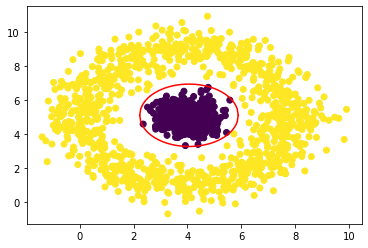

In [36]:
R = np.sqrt(b)
x = np.linspace(W[0]-R, W[0]+R, 100)
y1 = W[1] + np.sqrt(R*R-(x-W[0])*(x-W[0]))
y2 = W[1] - np.sqrt(R*R-(x-W[0])*(x-W[0]))                   
x = np.reshape(x,[100,1])
y1 = np.reshape(y1,[100,1])
y2 = np.reshape(y2,[100,1])
plt.plot(x, y1, "-r", x, y2, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

print(W,b)
print(x.shape)
print(y1.shape)

## Method 2: Keras, Ch. 2

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(2, activation="softmax")
])

In [39]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [40]:
model.fit(inputs, targets, epochs=4000, batch_size=2000)

Epoch 1/4000
1/1 [==============================] - 2s 2s/step - loss: 0.6983 - accuracy: 0.5000
Epoch 2/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.7492 - accuracy: 0.5000
Epoch 3/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.6516 - accuracy: 0.6785
Epoch 4/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.6283 - accuracy: 0.8805
Epoch 5/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.6118 - accuracy: 0.8630
Epoch 6/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.5971 - accuracy: 0.8855
Epoch 7/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.5835 - accuracy: 0.8760
Epoch 8/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.5706 - accuracy: 0.8835
Epoch 9/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.5583 - accuracy: 0.8800
Epoch 10/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.5465 - accuracy: 0.8865
Epoch 11/4000
1/1 [=

1/1 [==============================] - 0s 5ms/step - loss: 0.2408 - accuracy: 0.8975
Epoch 166/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.2391 - accuracy: 0.9030
Epoch 167/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.2396 - accuracy: 0.8975
Epoch 168/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.2378 - accuracy: 0.9025
Epoch 169/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.2383 - accuracy: 0.8980
Epoch 170/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.9030
Epoch 171/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.2371 - accuracy: 0.8980
Epoch 172/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.9035
Epoch 173/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.2358 - accuracy: 0.8980
Epoch 174/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.2342 - accuracy: 0.9045
Epoch 175/4000


1/1 [==============================] - 0s 4ms/step - loss: 0.1838 - accuracy: 0.9120
Epoch 248/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.1819 - accuracy: 0.9360
Epoch 249/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.1821 - accuracy: 0.9120
Epoch 250/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.1802 - accuracy: 0.9360
Epoch 251/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.1805 - accuracy: 0.9125
Epoch 252/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.9365
Epoch 253/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.1789 - accuracy: 0.9125
Epoch 254/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.1770 - accuracy: 0.9370
Epoch 255/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.1772 - accuracy: 0.9140
Epoch 256/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.9380
Epoch 257/4000


1/1 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9510
Epoch 330/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.1138 - accuracy: 0.9730
Epoch 331/4000
1/1 [==============================] - 0s 3ms/step - loss: 0.1136 - accuracy: 0.9530
Epoch 332/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.1122 - accuracy: 0.9740
Epoch 333/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.1120 - accuracy: 0.9550
Epoch 334/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.1107 - accuracy: 0.9740
Epoch 335/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.9570
Epoch 336/4000
1/1 [==============================] - 0s 3ms/step - loss: 0.1092 - accuracy: 0.9745
Epoch 337/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.1090 - accuracy: 0.9580
Epoch 338/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9760
Epoch 339/4000


1/1 [==============================] - 0s 5ms/step - loss: 0.0628 - accuracy: 0.9845
Epoch 412/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0622 - accuracy: 0.9910
Epoch 413/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0618 - accuracy: 0.9855
Epoch 414/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0613 - accuracy: 0.9915
Epoch 415/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0609 - accuracy: 0.9855
Epoch 416/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0604 - accuracy: 0.9925
Epoch 417/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9870
Epoch 418/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0595 - accuracy: 0.9925
Epoch 419/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0591 - accuracy: 0.9880
Epoch 420/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0586 - accuracy: 0.9925
Epoch 421/4000


1/1 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.9935
Epoch 494/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0341 - accuracy: 0.9975
Epoch 495/4000
1/1 [==============================] - 0s 8ms/step - loss: 0.0337 - accuracy: 0.9935
Epoch 496/4000
1/1 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9975
Epoch 497/4000
1/1 [==============================] - 0s 10ms/step - loss: 0.0333 - accuracy: 0.9935
Epoch 498/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0332 - accuracy: 0.9975
Epoch 499/4000
1/1 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.9935
Epoch 500/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.9975
Epoch 501/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0324 - accuracy: 0.9935
Epoch 502/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.9975
Epoch 503/4000

1/1 [==============================] - 0s 6ms/step - loss: 0.0201 - accuracy: 0.9960
Epoch 576/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0201 - accuracy: 0.9990
Epoch 577/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198 - accuracy: 0.9960
Epoch 578/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0199 - accuracy: 0.9990
Epoch 579/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0196 - accuracy: 0.9965
Epoch 580/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9990
Epoch 581/4000
1/1 [==============================] - 0s 8ms/step - loss: 0.0194 - accuracy: 0.9965
Epoch 582/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194 - accuracy: 0.9990
Epoch 583/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9965
Epoch 584/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0192 - accuracy: 0.9990
Epoch 585/4000


1/1 [==============================] - 0s 5ms/step - loss: 0.0128 - accuracy: 0.9975
Epoch 658/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128 - accuracy: 0.9990
Epoch 659/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126 - accuracy: 0.9980
Epoch 660/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0127 - accuracy: 0.9990
Epoch 661/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126 - accuracy: 0.9975
Epoch 662/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127 - accuracy: 0.9990
Epoch 663/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127 - accuracy: 0.9975
Epoch 664/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128 - accuracy: 0.9990
Epoch 665/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128 - accuracy: 0.9975
Epoch 666/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.9990
Epoch 667/4000


1/1 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.9970
Epoch 740/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137 - accuracy: 0.9980
Epoch 741/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9960
Epoch 742/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.9985
Epoch 743/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9995
Epoch 744/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 0.9995
Epoch 745/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9995
Epoch 746/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 0.9995
Epoch 747/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 0.9995
Epoch 748/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 0.9995
Epoch 749/4000


1/1 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.9995
Epoch 822/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.9995
Epoch 823/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.9995
Epoch 824/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 0.9995
Epoch 825/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - accuracy: 0.9995
Epoch 826/4000
1/1 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.9995
Epoch 827/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0058 - accuracy: 0.9995
Epoch 828/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.9995
Epoch 829/4000
1/1 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.9980
Epoch 830/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0166 - accuracy: 0.9940
Epoch 831/4000


1/1 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.9945
Epoch 904/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9975
Epoch 905/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 0.9995
Epoch 906/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0045 - accuracy: 0.9995
Epoch 907/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.9995
Epoch 908/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.9995
Epoch 909/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.9995
Epoch 910/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.9995
Epoch 911/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 0.9995
Epoch 912/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 0.9995
Epoch 913/4000


1/1 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 0.9995
Epoch 986/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 0.9995
Epoch 987/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 0.9995
Epoch 988/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 989/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 990/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 991/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 992/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 993/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 0.9995
Epoch 994/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 0.9995
Epoch 995/4000


1/1 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 1148/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 1149/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 1150/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 1151/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 1152/4000
1/1 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 1153/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 1154/4000
1/1 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 1155/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 1156/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 1310/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 1311/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 1312/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 1313/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 1314/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 1315/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 1316/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 1317/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 1318/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 1472/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 1473/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1474/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0045 - accuracy: 0.9980
Epoch 1475/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.9950
Epoch 1476/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.9975
Epoch 1477/4000
1/1 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1478/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 1479/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 1480/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1634/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1635/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1636/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1637/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1638/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1639/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1640/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1641/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1642/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 1796/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1797/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0067 - accuracy: 0.9975
Epoch 1798/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.9965
Epoch 1799/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0035 - accuracy: 0.9985
Epoch 1800/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1801/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1802/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1803/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1804/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1958/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1959/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1960/4000
1/1 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1961/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1962/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1963/4000
1/1 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1964/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1965/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1966/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0045 - accuracy: 0.9970
Epoch 2120/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.9975
Epoch 2121/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 2122/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 0.9995
Epoch 2123/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2124/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2125/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2126/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2127/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2128/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 

Epoch 2281/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.9988e-04 - accuracy: 1.0000
Epoch 2282/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.9524e-04 - accuracy: 1.0000
Epoch 2283/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.9343e-04 - accuracy: 1.0000
Epoch 2284/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.9742e-04 - accuracy: 1.0000
Epoch 2285/4000
1/1 [==============================] - 0s 6ms/step - loss: 9.9357e-04 - accuracy: 1.0000
Epoch 2286/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.8906e-04 - accuracy: 1.0000
Epoch 2287/4000
1/1 [==============================] - 0s 6ms/step - loss: 9.8606e-04 - accuracy: 1.0000
Epoch 2288/4000
1/1 [==============================] - 0s 6ms/step - loss: 9.8276e-04 - accuracy: 1.0000
Epoch 2289/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.8034e-04 - accuracy: 1.0000
Epoch 2290/4000
1/1 [==============================] - 

1/1 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9975
Epoch 2438/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9965
Epoch 2439/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 0.9980
Epoch 2440/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.3884e-04 - accuracy: 1.0000
Epoch 2441/4000
1/1 [==============================] - 0s 6ms/step - loss: 9.1685e-04 - accuracy: 1.0000
Epoch 2442/4000
1/1 [==============================] - 0s 6ms/step - loss: 9.1255e-04 - accuracy: 1.0000
Epoch 2443/4000
1/1 [==============================] - 0s 6ms/step - loss: 9.0909e-04 - accuracy: 1.0000
Epoch 2444/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.0561e-04 - accuracy: 1.0000
Epoch 2445/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.0536e-04 - accuracy: 1.0000
Epoch 2446/4000
1/1 [==============================] - 0s 5ms/step - loss: 9.1031e-

1/1 [==============================] - 0s 5ms/step - loss: 8.3711e-04 - accuracy: 1.0000
Epoch 2594/4000
1/1 [==============================] - 0s 6ms/step - loss: 8.3650e-04 - accuracy: 1.0000
Epoch 2595/4000
1/1 [==============================] - 0s 7ms/step - loss: 8.3542e-04 - accuracy: 1.0000
Epoch 2596/4000
1/1 [==============================] - 0s 5ms/step - loss: 8.3446e-04 - accuracy: 1.0000
Epoch 2597/4000
1/1 [==============================] - 0s 5ms/step - loss: 8.3912e-04 - accuracy: 1.0000
Epoch 2598/4000
1/1 [==============================] - 0s 5ms/step - loss: 8.4069e-04 - accuracy: 1.0000
Epoch 2599/4000
1/1 [==============================] - 0s 5ms/step - loss: 8.3899e-04 - accuracy: 1.0000
Epoch 2600/4000
1/1 [==============================] - 0s 6ms/step - loss: 8.3715e-04 - accuracy: 1.0000
Epoch 2601/4000
1/1 [==============================] - 0s 5ms/step - loss: 8.4193e-04 - accuracy: 1.0000
Epoch 2602/4000
1/1 [==============================] - 0s 6ms/step - lo

1/1 [==============================] - 0s 5ms/step - loss: 8.0440e-04 - accuracy: 1.0000
Epoch 2750/4000
1/1 [==============================] - 0s 6ms/step - loss: 7.8135e-04 - accuracy: 1.0000
Epoch 2751/4000
1/1 [==============================] - 0s 6ms/step - loss: 7.7843e-04 - accuracy: 1.0000
Epoch 2752/4000
1/1 [==============================] - 0s 8ms/step - loss: 7.7390e-04 - accuracy: 1.0000
Epoch 2753/4000
1/1 [==============================] - 0s 5ms/step - loss: 7.7108e-04 - accuracy: 1.0000
Epoch 2754/4000
1/1 [==============================] - 0s 5ms/step - loss: 7.7023e-04 - accuracy: 1.0000
Epoch 2755/4000
1/1 [==============================] - 0s 5ms/step - loss: 7.6763e-04 - accuracy: 1.0000
Epoch 2756/4000
1/1 [==============================] - 0s 6ms/step - loss: 7.6706e-04 - accuracy: 1.0000
Epoch 2757/4000
1/1 [==============================] - 0s 4ms/step - loss: 7.6854e-04 - accuracy: 1.0000
Epoch 2758/4000
1/1 [==============================] - 0s 7ms/step - lo

1/1 [==============================] - 0s 6ms/step - loss: 7.1584e-04 - accuracy: 1.0000
Epoch 2906/4000
1/1 [==============================] - 0s 6ms/step - loss: 7.1927e-04 - accuracy: 1.0000
Epoch 2907/4000
1/1 [==============================] - 0s 5ms/step - loss: 7.2134e-04 - accuracy: 1.0000
Epoch 2908/4000
1/1 [==============================] - 0s 5ms/step - loss: 7.1912e-04 - accuracy: 1.0000
Epoch 2909/4000
1/1 [==============================] - 0s 7ms/step - loss: 7.1517e-04 - accuracy: 1.0000
Epoch 2910/4000
1/1 [==============================] - 0s 6ms/step - loss: 7.1299e-04 - accuracy: 1.0000
Epoch 2911/4000
1/1 [==============================] - 0s 5ms/step - loss: 7.1556e-04 - accuracy: 1.0000
Epoch 2912/4000
1/1 [==============================] - 0s 5ms/step - loss: 7.3866e-04 - accuracy: 1.0000
Epoch 2913/4000
1/1 [==============================] - 0s 6ms/step - loss: 8.6586e-04 - accuracy: 1.0000
Epoch 2914/4000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.9965
Epoch 3062/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.9975
Epoch 3063/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3064/4000
1/1 [==============================] - 0s 6ms/step - loss: 6.8558e-04 - accuracy: 1.0000
Epoch 3065/4000
1/1 [==============================] - 0s 5ms/step - loss: 6.8008e-04 - accuracy: 1.0000
Epoch 3066/4000
1/1 [==============================] - 0s 8ms/step - loss: 6.7547e-04 - accuracy: 1.0000
Epoch 3067/4000
1/1 [==============================] - 0s 6ms/step - loss: 6.7292e-04 - accuracy: 1.0000
Epoch 3068/4000
1/1 [==============================] - 0s 8ms/step - loss: 6.7280e-04 - accuracy: 1.0000
Epoch 3069/4000
1/1 [==============================] - 0s 5ms/step - loss: 6.6915e-04 - accuracy: 1.0000
Epoch 3070/4000
1/1 [==============================] - 0s 7ms/step - loss: 6.6636e-

1/1 [==============================] - 0s 6ms/step - loss: 6.2595e-04 - accuracy: 1.0000
Epoch 3218/4000
1/1 [==============================] - 0s 4ms/step - loss: 6.2553e-04 - accuracy: 1.0000
Epoch 3219/4000
1/1 [==============================] - 0s 7ms/step - loss: 6.2379e-04 - accuracy: 1.0000
Epoch 3220/4000
1/1 [==============================] - 0s 5ms/step - loss: 6.2329e-04 - accuracy: 1.0000
Epoch 3221/4000
1/1 [==============================] - 0s 6ms/step - loss: 6.2588e-04 - accuracy: 1.0000
Epoch 3222/4000
1/1 [==============================] - 0s 5ms/step - loss: 6.2731e-04 - accuracy: 1.0000
Epoch 3223/4000
1/1 [==============================] - 0s 6ms/step - loss: 6.2638e-04 - accuracy: 1.0000
Epoch 3224/4000
1/1 [==============================] - 0s 5ms/step - loss: 6.2421e-04 - accuracy: 1.0000
Epoch 3225/4000
1/1 [==============================] - 0s 6ms/step - loss: 6.2478e-04 - accuracy: 1.0000
Epoch 3226/4000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 6ms/step - loss: 5.8770e-04 - accuracy: 1.0000
Epoch 3374/4000
1/1 [==============================] - 0s 5ms/step - loss: 5.8581e-04 - accuracy: 1.0000
Epoch 3375/4000
1/1 [==============================] - 0s 6ms/step - loss: 5.8656e-04 - accuracy: 1.0000
Epoch 3376/4000
1/1 [==============================] - 0s 5ms/step - loss: 5.8852e-04 - accuracy: 1.0000
Epoch 3377/4000
1/1 [==============================] - 0s 6ms/step - loss: 5.8655e-04 - accuracy: 1.0000
Epoch 3378/4000
1/1 [==============================] - 0s 6ms/step - loss: 5.8738e-04 - accuracy: 1.0000
Epoch 3379/4000
1/1 [==============================] - 0s 6ms/step - loss: 6.0213e-04 - accuracy: 1.0000
Epoch 3380/4000
1/1 [==============================] - 0s 5ms/step - loss: 6.3727e-04 - accuracy: 1.0000
Epoch 3381/4000
1/1 [==============================] - 0s 5ms/step - loss: 7.7024e-04 - accuracy: 1.0000
Epoch 3382/4000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 5ms/step - loss: 5.8986e-04 - accuracy: 1.0000
Epoch 3530/4000
1/1 [==============================] - 0s 6ms/step - loss: 6.9234e-04 - accuracy: 1.0000
Epoch 3531/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3532/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 0.9980
Epoch 3533/4000
1/1 [==============================] - 0s 8ms/step - loss: 0.0060 - accuracy: 0.9960
Epoch 3534/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 0.9980
Epoch 3535/4000
1/1 [==============================] - 0s 6ms/step - loss: 5.9369e-04 - accuracy: 1.0000
Epoch 3536/4000
1/1 [==============================] - 0s 8ms/step - loss: 5.6872e-04 - accuracy: 1.0000
Epoch 3537/4000
1/1 [==============================] - 0s 5ms/step - loss: 5.6225e-04 - accuracy: 1.0000
Epoch 3538/4000
1/1 [==============================] - 0s 6ms/step - loss: 5.5932e-04 -

1/1 [==============================] - 0s 6ms/step - loss: 5.2984e-04 - accuracy: 1.0000
Epoch 3686/4000
1/1 [==============================] - 0s 6ms/step - loss: 5.4066e-04 - accuracy: 1.0000
Epoch 3687/4000
1/1 [==============================] - 0s 7ms/step - loss: 5.8871e-04 - accuracy: 1.0000
Epoch 3688/4000
1/1 [==============================] - 0s 6ms/step - loss: 8.0558e-04 - accuracy: 1.0000
Epoch 3689/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 3690/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9975
Epoch 3691/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0036 - accuracy: 0.9980
Epoch 3692/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.9990
Epoch 3693/4000
1/1 [==============================] - 0s 6ms/step - loss: 5.3735e-04 - accuracy: 1.0000
Epoch 3694/4000
1/1 [==============================] - 0s 5ms/step - loss: 5.3137e-04 -

1/1 [==============================] - 0s 6ms/step - loss: 4.9230e-04 - accuracy: 1.0000
Epoch 3842/4000
1/1 [==============================] - 0s 7ms/step - loss: 4.9372e-04 - accuracy: 1.0000
Epoch 3843/4000
1/1 [==============================] - 0s 8ms/step - loss: 4.9412e-04 - accuracy: 1.0000
Epoch 3844/4000
1/1 [==============================] - 0s 6ms/step - loss: 4.9353e-04 - accuracy: 1.0000
Epoch 3845/4000
1/1 [==============================] - 0s 7ms/step - loss: 5.0520e-04 - accuracy: 1.0000
Epoch 3846/4000
1/1 [==============================] - 0s 6ms/step - loss: 5.2283e-04 - accuracy: 1.0000
Epoch 3847/4000
1/1 [==============================] - 0s 6ms/step - loss: 5.9189e-04 - accuracy: 1.0000
Epoch 3848/4000
1/1 [==============================] - 0s 6ms/step - loss: 8.1699e-04 - accuracy: 1.0000
Epoch 3849/4000
1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 0.9990
Epoch 3850/4000
1/1 [==============================] - 0s 6ms/step - loss: 

1/1 [==============================] - 0s 5ms/step - loss: 4.6523e-04 - accuracy: 1.0000
Epoch 3998/4000
1/1 [==============================] - 0s 5ms/step - loss: 4.6647e-04 - accuracy: 1.0000
Epoch 3999/4000
1/1 [==============================] - 0s 5ms/step - loss: 4.6582e-04 - accuracy: 1.0000
Epoch 4000/4000
1/1 [==============================] - 0s 6ms/step - loss: 4.6653e-04 - accuracy: 1.0000


In [41]:
test_digits = Tinputs[0:5]
predictions = model.predict(test_digits)
print(predictions.shape)
predictions[1]

(5, 2)


array([1.0000000e+00, 8.3260066e-09], dtype=float32)

In [42]:
predictions[1].argmax()

0

In [43]:
predictions[1][0]

1.0

In [44]:
Ttargets[1]

array([0.], dtype=float32)

In [45]:
test_loss, test_acc = model.evaluate(Tinputs, Ttargets)
print(f"test_acc: {test_acc}")

63/63 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9995
test_acc: 0.9994999766349792


## Generating the decision map  (Larry 1/16/2022)

(100000, 2)


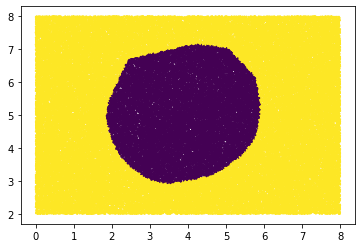

In [46]:
import matplotlib.pyplot as plt

num_samples = 100000

x0 = np.random.uniform(0,8,num_samples)
y0 = np.random.uniform(2,8,num_samples)
FinalInputs = np.vstack((x0, y0)).astype(np.float32)
FinalInputs = np.transpose(FinalInputs)

print(FinalInputs.shape)

predictions = model.predict(FinalInputs)

plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=predictions[:, 1] > 0.5, s=1)
plt.show()

In [47]:
from keras import backend as K

for w in model.trainable_weights:
    print(K.eval(w))

[[ 0.09807246  0.00905943 -0.08568715 ... -0.13000317  0.09307373
   0.01649563]
 [ 0.11098508  0.05650832 -0.06843792 ... -0.03626907  0.05296586
   0.0694574 ]]
[ 0.28146    -0.32053712  0.         -0.3933854  -0.01862766  0.29737106
 -0.31829733 -0.3056709  -0.04136493  0.29247713 -0.00324031  0.30520514
 -0.2169095  -0.3425611  -0.3179236   0.310246   -0.31608447  0.
  0.          0.30815378  0.28233418 -0.0030739   0.2866886  -0.43962002
  0.3012195   0.          0.28875118 -0.44291687 -0.40941188 -0.01546542
 -0.39817563  0.3149574   0.7052797  -0.44797626  0.         -0.3996336
 -0.25002486  0.29770124  0.          0.         -0.03878636  0.27926397
 -0.00696377  0.         -0.376538   -0.24541846 -0.06225657 -0.20081502
  0.28730196 -0.35151908  0.73806727 -0.4133487   0.          0.7387864
  0.2964087  -0.33351573  0.31373593 -0.31223336  0.30270025  0.3067179
 -0.40965545  0.29363918  0.28495014 -0.33861396 -0.447407    0.28502685
  0.29988527  0.         -0.00874343  0.28023

(1000000, 2)
(2, 1)
(1000000, 1)


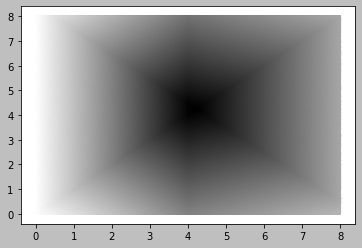

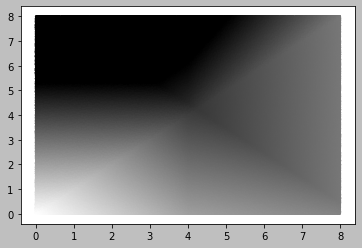

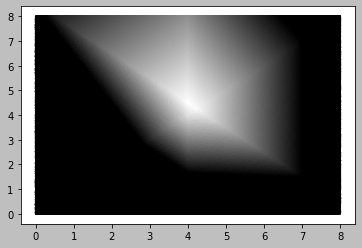

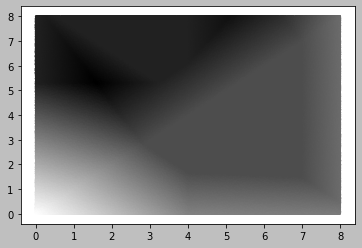

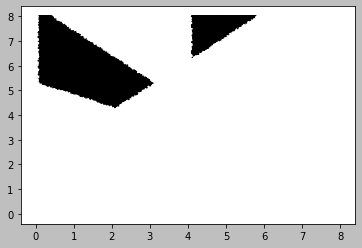

22.97684 5.754655


In [345]:
import matplotlib.pyplot as plt

num_samples = 1000000

x0 = np.random.uniform(0,8,num_samples)
y0 = np.random.uniform(0,8,num_samples)
FinalInputs = np.vstack((x0, y0)).astype(np.float32)
FinalInputs = tf.transpose(FinalInputs)

print(FinalInputs.shape)

W1 = tf.constant(np.array([[1],
                            [0]]),
                            dtype=tf.float32)
W2 = tf.constant(np.array([[-0.707],
                            [0.707]]),
                            dtype=tf.float32)
W3 = tf.constant(np.array([[-0.707],
                            [-0.707]]),
                            dtype=tf.float32)

p1 = tf.math.maximum(0, tf.matmul(FinalInputs, W1) - 4)
p2 = tf.math.maximum(0, tf.matmul(FinalInputs, W2) + 0)
p3 = tf.math.maximum(0, tf.matmul(FinalInputs, W3) + 6)

p = p1 + p2 + p3 


print(W1.shape)
print(p1.shape)

#print(predictions[:,0], predictions[:,1])
#plt.style.use('grayscale')
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p1[:, 0]  , s=1)
#plt.show()
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p2[:, 0]  , s=1)
#plt.show()
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p3[:, 0]  , s=1)
#plt.show()
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p[:, 0]  , s=1)
#plt.show()
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p[:, 0]>2  , s=1)
#plt.show()

pA = tf.math.maximum(0,1 * p1 + 1 * p2 + 1 * p3 + 2)
pB = tf.math.maximum(0,1 * p1 - 2 * p2 + 2 * p3 + 3)
pC = tf.math.maximum(0,-2 * p1 - 1 * p2 - 3 * p3 + 6)

p = pA + pB + pC
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=pA[:, 0]  , s=1)
plt.show()
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=pB[:, 0]  , s=1)
plt.show()
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=pC[:, 0]  , s=1)
plt.show()
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p[:, 0]  , s=1)
plt.show()
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p[:, 0]>7.9  , s=1)
plt.show()

print(np.amax(p), np.amin(p))

In [231]:
nx, ny = (2, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
yv


array([[0., 0.],
       [1., 1.]])

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [25]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [26]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [27]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [29]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [30]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [32]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 5ms/step - loss: 9.6050 - binary_accuracy: 0.5090
Epoch 2/5
16/16 [==============================] - 0s 5ms/step - loss: 9.1062 - binary_accuracy: 0.5095
Epoch 3/5
16/16 [==============================] - 0s 5ms/step - loss: 8.6878 - binary_accuracy: 0.5095
Epoch 4/5
16/16 [==============================] - 0s 4ms/step - loss: 8.2859 - binary_accuracy: 0.5100
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 7.8952 - binary_accuracy: 0.5110


In [33]:
history.history

{'loss': [9.604981422424316,
  9.10621166229248,
  8.687845230102539,
  8.28591251373291,
  7.895242214202881],
 'binary_accuracy': [0.5090000033378601,
  0.5095000267028809,
  0.5095000267028809,
  0.5099999904632568,
  0.5109999775886536]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [34]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0972 - binary_accuracy: 0.9543 - val_loss: 0.0455 - val_binary_accuracy: 0.9967
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0752 - binary_accuracy: 0.9529 - val_loss: 0.0367 - val_binary_accuracy: 0.9900
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0755 - binary_accuracy: 0.9536 - val_loss: 0.2297 - val_binary_accuracy: 0.7283
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0657 - binary_accuracy: 0.9643 - val_loss: 0.0361 - val_binary_accuracy: 0.9983
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0739 - binary_accuracy: 0.9543 - val_loss: 0.0576 - val_binary_accuracy: 0.9950


### Inference: Using a model after training

In [35]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.23570466]
 [-0.09319162]
 [-0.21924692]
 [ 0.9494563 ]
 [ 0.00919491]
 [-0.44920444]
 [ 0.03428194]
 [ 0.63351494]
 [ 1.1627355 ]
 [ 1.0470035 ]]


## Summary